# **Customer Churn Prediction using ANN**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


## **Import Required Libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Read the Data**

In [3]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check the shape of the dataframe
df.shape

(10000, 14)

## **Data Preprocessing**

In [5]:
# Check for the missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check the information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Drop the irrelevant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Check for the duplicated rows
df.duplicated().sum()

0

In [9]:
# Check the number of people who Exited
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

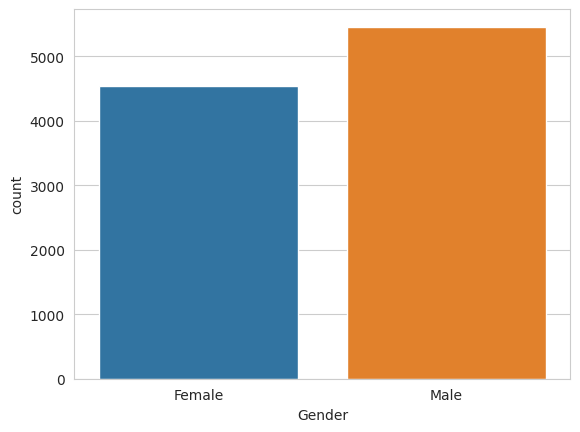

In [10]:
# Plot the categorical variables
sns.countplot(x=df["Gender"])
plt.show()

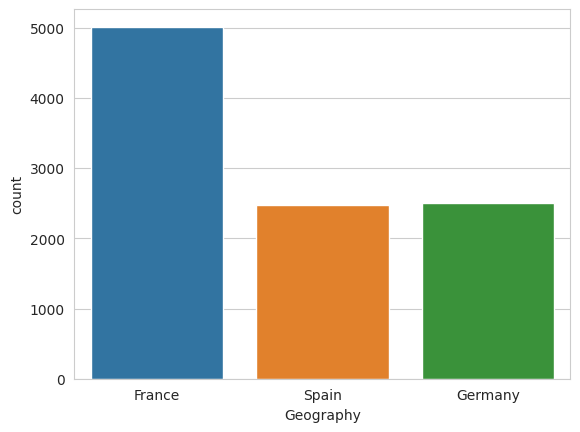

In [11]:
sns.countplot(x=df["Geography"])
plt.show()

In [12]:
# Apply One Hot Encoding on Categorical columns
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## **Train Test Split**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Exited", axis=1),
                                                    df["Exited"],
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

## **Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Create an object of the StandardScaler class
scaler = StandardScaler()

# Fit the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

## **Build an Artifical Neural Network**

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Instantiate a Sequential model
model = Sequential()

# Add two Dense layer with 11 nodes into the Sequential Model
model.add(Dense(11, activation="relu", input_dim=11))
model.add(Dense(11, activation="relu"))

# Add another layer for the output with a single node
model.add(Dense(1, activation="sigmoid"))

In [20]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [22]:
# Fit the training data
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 6s 4ms/step - loss: 0.5232 - accuracy: 0.7845 - val_loss: 0.4668 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.7958 - val_loss: 0.4489 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.7958 - val_loss: 0.4417 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4331 - accuracy: 0.7958 - val_loss: 0.4363 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4280 - accuracy: 0.7966 - val_loss: 0.4319 - val_accuracy: 0.8062
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4237 - accuracy: 0.8047 - val_loss: 0.4272 - val_accuracy: 0.8144
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8152 - val_loss: 0.4226 - val_accuracy: 0.8175

In [23]:
# Check all 132 weights of the first layer
model.layers[0].get_weights()[0]

array([[-0.2201297 , -0.2561814 , -0.06925394,  0.20761363,  0.28628358,
         0.04310253,  0.07334142,  0.09160335, -0.04909608,  0.12110082,
        -0.07761919],
       [ 0.94942856, -0.88033396, -0.2532562 ,  0.30340934, -0.47571146,
        -0.23202303,  0.13324459,  0.4249229 , -0.79431355,  0.49216118,
        -0.4669855 ],
       [-0.18972132, -0.1624947 , -0.05784958,  0.17031173, -0.23392388,
         0.01977917,  0.00389929,  0.00926839,  0.00483385,  0.13334826,
        -0.06395531],
       [-0.2642813 ,  0.09607118, -0.31413198, -0.9318075 ,  0.23275127,
        -0.23956077, -0.16304658, -0.02548202,  0.12010734,  0.42493188,
        -0.19461185],
       [-0.52671105, -0.13551553, -0.20574954, -0.5222244 , -0.05002894,
        -0.29467627, -1.2931043 ,  0.96495724, -0.26200897, -0.3488732 ,
        -0.3184586 ],
       [-0.23318867,  0.0843712 ,  0.08495087,  0.11545004, -0.18774858,
        -0.13801534,  0.07076009,  0.03904931,  0.109185  ,  0.42128995,
         0.084

In [24]:
# Check all the weights of the second layer
model.layers[1].get_weights()

[array([[-5.27164042e-01, -9.45597440e-02,  3.10227156e-01,
          1.33840427e-01, -5.99915385e-01, -4.90191609e-01,
         -9.10486758e-01, -5.64238071e-01, -7.37893462e-01,
          7.56060243e-01,  2.76632130e-01],
        [-6.35056317e-01,  1.45510882e-01,  1.49532050e-01,
          8.09053630e-02,  1.76078796e-01, -7.22699333e-04,
          3.59074235e-01, -3.59594285e-01, -4.65714961e-01,
          4.82038036e-02, -1.05583918e+00],
        [ 5.71410179e-01, -1.84961572e-01,  8.33427757e-02,
          1.10661224e-01,  3.51531446e-01,  4.42042410e-01,
         -6.06605932e-02,  2.40314782e-01,  3.31868589e-01,
         -3.70255232e-01, -4.79995340e-01],
        [ 1.80674404e-01, -4.70571399e-01, -3.68171781e-02,
          7.60213673e-01, -2.42827594e-01, -3.83281261e-02,
         -7.62662739e-02, -4.21827406e-01, -1.65960595e-01,
          4.59727466e-01,  5.30085742e-01],
        [ 4.86092895e-01, -3.22111040e-01, -8.92930776e-02,
         -4.41085964e-01, -6.19164765e-01,  

In [25]:
# Check all the weights of the last layer
model.layers[2].get_weights()

[array([[-0.7098882 ],
        [ 1.5098363 ],
        [-0.8408857 ],
        [ 1.0782173 ],
        [-0.2521104 ],
        [-0.69690955],
        [-0.49316746],
        [-0.48142573],
        [-0.53976524],
        [-1.0892011 ],
        [-0.9612555 ]], dtype=float32),
 array([0.26346537], dtype=float32)]

## **Predict the Test Data**

In [26]:
y_pred = model.predict(X_test_scaled)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.26413718],
       [0.2086768 ],
       [0.06008315],
       ...,
       [0.15121657],
       [0.25462443],
       [0.17219877]], dtype=float32)

In [27]:
# Convert the predicted probability into binary classes
# Assume a threshold value
threshold = 0.5

y_pred = np.where(y_pred > threshold, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## **Accuracy Assessment**

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8585


## **Plot the Training and Validation Loss**

In [43]:
# Print the key names of the history dictionary
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

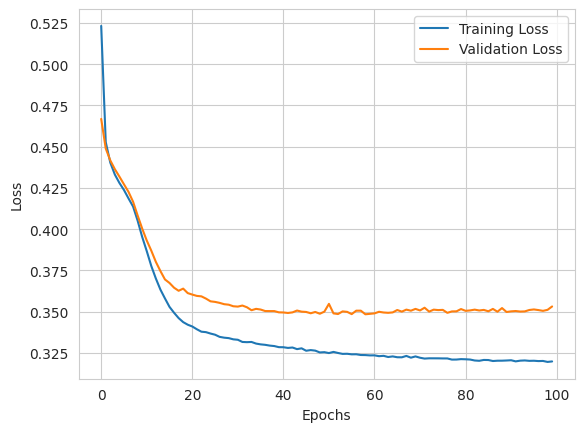

In [37]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

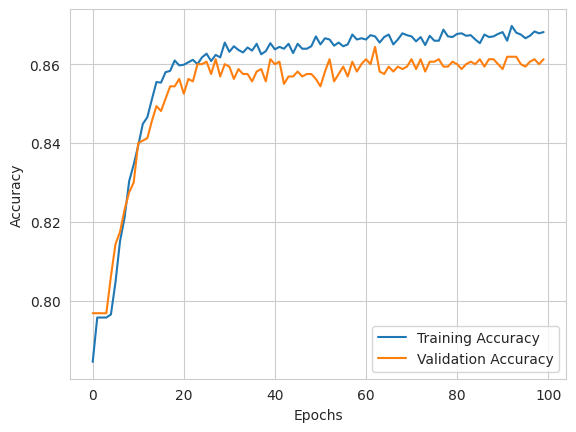

In [40]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()